In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from skimage.color import rgb2lab, lab2rgb
from matplotlib import patches as patch
from skimage import measure
from mpl_toolkits.mplot3d import Axes3D
import math
import tqdm
from sklearn.model_selection import train_test_split


In [2]:
def objects(path):
    object  = os.listdir(path)
    return object
path = "C:/Users/renep/Google Drive/5.1/AP 186/Banana/"
name = objects(path = path)

def dataset_loader(datatype, imagetype):
    def loadImages(path = path +str(datatype)+"/"):

        return[os.path.join(path,f) for f in os.listdir(path) if f.endswith(imagetype)]

    filenames = loadImages()
    images = []
    for file in filenames:
        image = cv2.imread(file)
        image = cv2.resize(image, (100,100))
        images.append((image[:,:,::-1])/255)

    return images


In [3]:
def LAB_mean(datatype):
    images = dataset_loader(datatype, ".jpg")

    a_ = []
    b_ = []
    hue = []
    for i in range(len(images)):
        img = images[i]#[:,:,::-1]
        lab = rgb2lab(img)
        a,b = lab[:,:,1].ravel(),lab[:,:,2].ravel()
        a_.append(np.mean(a))
        b_.append(np.mean(b))
        h = math.atan2(np.mean(b),np.mean(a)) * 180 / np.pi
        if h < 0:
            h = 360 - np.abs(h)
        hue.append(h)
        

    return a_, b_, hue

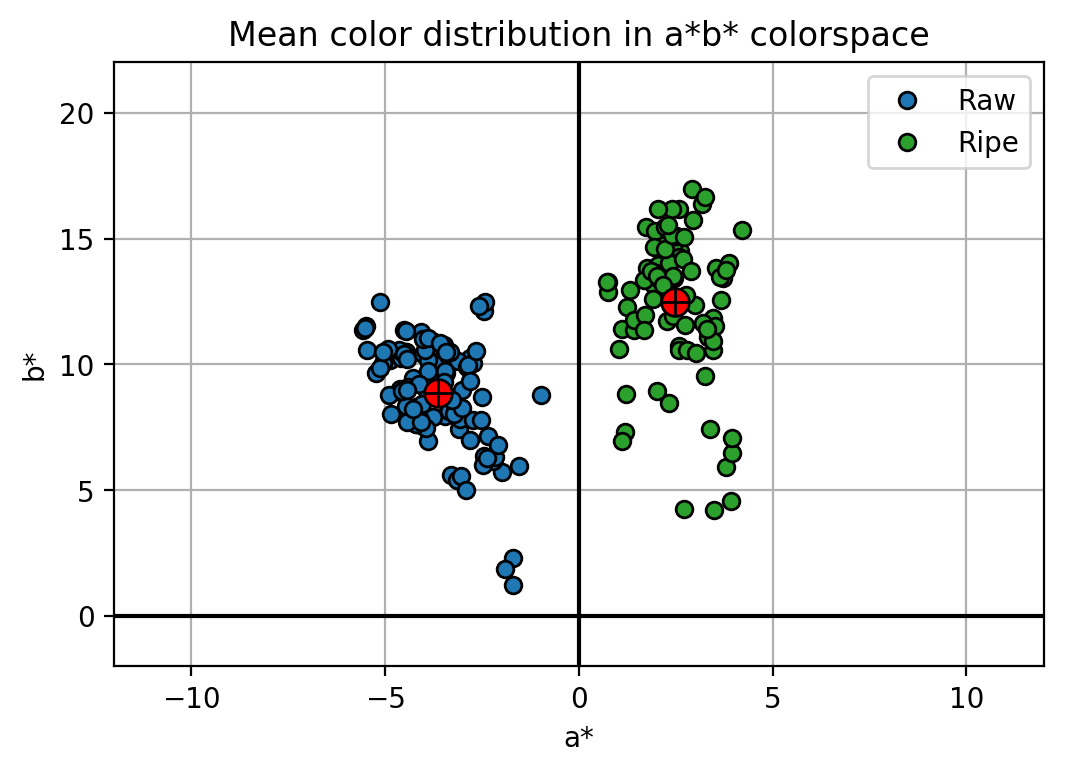

In [4]:
plt.figure(dpi=200)
plt.axhline(0, color = 'k')
plt.axvline(0, color = 'k')

l = [0,1]
data = np.zeros(shape=[80,2,2])
A,B = [],[]
label_A, label_B = [],[]
mean = np.zeros(shape=[2,2])

for i in name:
    classs = name.index(i)
    a_, b_, hue = LAB_mean(i)
    data[:,0, classs] = a_[:80]
    data[:,1, classs] = b_[:80]
    for a in a_: 
        A.append(a/100)
        label_A.append(l[classs])
    for b in b_: 
        B.append(b/100)
        label_B.append(l[classs])


    mean[classs,0] = np.mean(a_)
    mean[classs,1] = np.mean(b_)
    
    plt.plot(a_,b_,'o',ms = 6, mec = 'k', label = i)
    plt.plot(np.mean(a_),np.mean(b_), 'ro', ms= 10, mec = 'k')
    plt.plot(np.mean(a_),np.mean(b_), '+', ms= 10, mec = 'k')

    plt.xlabel("a*")
    plt.ylabel("b*")
    plt.xlim(-12,12)
    plt.ylim(-2,22)
    
plt.legend()
plt.grid()
plt.title("Mean color distribution in a*b* colorspace")

DATA = np.zeros(shape = [192,2])
DATA[:,0],DATA[:,1] = np.array(A),np.array(B)
LABEL = np.zeros(shape = [192,2])
LABEL[:,0],LABEL[:,1] = np.array(label_A),np.array(label_B)


In [13]:
def initialize_parameters(n_x, n_h, n_y):
  W1 = np.random.randn(n_h, n_x)
  b1 = np.zeros((n_h, 1))
  W2 = np.random.randn(n_y, n_h)
  b2 = np.zeros((n_y, 1))

  parameters = {
    "W1": W1,
    "b1" : b1,
    "W2": W2,
    "b2" : b2
  }
  return parameters

def forward_prop(X, parameters):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  Z1 = np.dot(W1, X) + b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)

  cache = {
    "A1": A1,
    "A2": A2
  }
  return A2, cache


def calculate_cost(A2, Y):
  cost = -np.sum(np.multiply(Y, np.log(A2)) +  np.multiply(1-Y, np.log(1-A2)))/m
  cost = np.squeeze(cost)

  return cost

def backward_prop(X, Y, cache, parameters):
  A1 = cache["A1"]
  A2 = cache["A2"]

  W2 = parameters["W2"]

  dZ2 = A2 - Y
  dW2 = np.dot(dZ2, A1.T)/m
  db2 = np.sum(dZ2, axis=1, keepdims=True)/m
  dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
  dW1 = np.dot(dZ1, X.T)/m
  db1 = np.sum(dZ1, axis=1, keepdims=True)/m

  grads = {
    "dW1": dW1,
    "db1": db1,
    "dW2": dW2,
    "db2": db2
  }

  return grads

def update_parameters(parameters, grads, learning_rate):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"]

  W1 = W1 - learning_rate*dW1
  b1 = b1 - learning_rate*db1
  W2 = W2 - learning_rate*dW2
  b2 = b2 - learning_rate*db2
  
  new_parameters = {
    "W1": W1,
    "W2": W2,
    "b1" : b1,
    "b2" : b2
  }

  return new_parameters

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [197]:
def model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate):

  COST = []
  VAL = []
    
  parameters = initialize_parameters(n_x, n_h, n_y)

  for i in range(0, num_of_iters+1):
    a2, cache = forward_prop(X, parameters)

    cost = calculate_cost(a2, Y)
    COST.append(cost)

    grads = backward_prop(X, Y, cache, parameters)

    parameters = update_parameters(parameters, grads, learning_rate)

    a2_val, cache_val = forward_prop(x_val.T, parameters)
    cost_val = calculate_cost(a2_val, y_val)
    VAL.append(cost_val)

    
    if(i%100 == 0):
      print('Cost after iteration# {:d}: {:f}'.format(i, cost))
      print('Validation loss after iteration# {:d}: {:f}'.format(i, cost_val))

  return parameters, COST, VAL

In [20]:
def predict(X, parameters):
  a2, cache = forward_prop(X, parameters)
  yhat = a2
  yhat = np.squeeze(yhat)

  return np.round(yhat)

In [200]:
np.random.seed(2)
X = DATA.T
Y = LABEL[:,0]
m = X.shape[1]
n_x = 2
n_h = 100
n_y = 1
num_of_iters = 50000
learning_rate = 0.1
x_test, x_val, y_test, y_val = train_test_split(X.T, Y, test_size=0.5, random_state = 42)
trained_parameters, COST, VAL = model(x_test.T, y_test, n_x, n_h, n_y, num_of_iters, learning_rate)

Cost after iteration# 0: 0.292051
Validation loss after iteration# 0: 0.285242
Cost after iteration# 100: 0.195516
Validation loss after iteration# 100: 0.196151
Cost after iteration# 200: 0.146849
Validation loss after iteration# 200: 0.147467
Cost after iteration# 300: 0.116926
Validation loss after iteration# 300: 0.117611
Cost after iteration# 400: 0.096896
Validation loss after iteration# 400: 0.097707
Cost after iteration# 500: 0.082618
Validation loss after iteration# 500: 0.083585
Cost after iteration# 600: 0.071949
Validation loss after iteration# 600: 0.073081
Cost after iteration# 700: 0.063686
Validation loss after iteration# 700: 0.064978
Cost after iteration# 800: 0.057101
Validation loss after iteration# 800: 0.058545
Cost after iteration# 900: 0.051733
Validation loss after iteration# 900: 0.053318
Cost after iteration# 1000: 0.047275
Validation loss after iteration# 1000: 0.048989
Cost after iteration# 1100: 0.043513
Validation loss after iteration# 1100: 0.045345
Cost

Validation loss after iteration# 9600: 0.008190
Cost after iteration# 9700: 0.005275
Validation loss after iteration# 9700: 0.008131
Cost after iteration# 9800: 0.005219
Validation loss after iteration# 9800: 0.008072
Cost after iteration# 9900: 0.005165
Validation loss after iteration# 9900: 0.008014
Cost after iteration# 10000: 0.005112
Validation loss after iteration# 10000: 0.007958
Cost after iteration# 10100: 0.005060
Validation loss after iteration# 10100: 0.007902
Cost after iteration# 10200: 0.005010
Validation loss after iteration# 10200: 0.007848
Cost after iteration# 10300: 0.004960
Validation loss after iteration# 10300: 0.007794
Cost after iteration# 10400: 0.004911
Validation loss after iteration# 10400: 0.007742
Cost after iteration# 10500: 0.004863
Validation loss after iteration# 10500: 0.007690
Cost after iteration# 10600: 0.004815
Validation loss after iteration# 10600: 0.007640
Cost after iteration# 10700: 0.004769
Validation loss after iteration# 10700: 0.007590
C

Validation loss after iteration# 19000: 0.005185
Cost after iteration# 19100: 0.002616
Validation loss after iteration# 19100: 0.005168
Cost after iteration# 19200: 0.002602
Validation loss after iteration# 19200: 0.005151
Cost after iteration# 19300: 0.002588
Validation loss after iteration# 19300: 0.005135
Cost after iteration# 19400: 0.002574
Validation loss after iteration# 19400: 0.005118
Cost after iteration# 19500: 0.002560
Validation loss after iteration# 19500: 0.005102
Cost after iteration# 19600: 0.002547
Validation loss after iteration# 19600: 0.005085
Cost after iteration# 19700: 0.002533
Validation loss after iteration# 19700: 0.005069
Cost after iteration# 19800: 0.002520
Validation loss after iteration# 19800: 0.005053
Cost after iteration# 19900: 0.002507
Validation loss after iteration# 19900: 0.005037
Cost after iteration# 20000: 0.002494
Validation loss after iteration# 20000: 0.005021
Cost after iteration# 20100: 0.002481
Validation loss after iteration# 20100: 0.0

Validation loss after iteration# 28400: 0.004065
Cost after iteration# 28500: 0.001720
Validation loss after iteration# 28500: 0.004057
Cost after iteration# 28600: 0.001714
Validation loss after iteration# 28600: 0.004049
Cost after iteration# 28700: 0.001707
Validation loss after iteration# 28700: 0.004041
Cost after iteration# 28800: 0.001701
Validation loss after iteration# 28800: 0.004033
Cost after iteration# 28900: 0.001695
Validation loss after iteration# 28900: 0.004024
Cost after iteration# 29000: 0.001689
Validation loss after iteration# 29000: 0.004016
Cost after iteration# 29100: 0.001683
Validation loss after iteration# 29100: 0.004008
Cost after iteration# 29200: 0.001677
Validation loss after iteration# 29200: 0.004001
Cost after iteration# 29300: 0.001671
Validation loss after iteration# 29300: 0.003993
Cost after iteration# 29400: 0.001665
Validation loss after iteration# 29400: 0.003985
Cost after iteration# 29500: 0.001659
Validation loss after iteration# 29500: 0.0

Validation loss after iteration# 37800: 0.003461
Cost after iteration# 37900: 0.001273
Validation loss after iteration# 37900: 0.003456
Cost after iteration# 38000: 0.001270
Validation loss after iteration# 38000: 0.003451
Cost after iteration# 38100: 0.001266
Validation loss after iteration# 38100: 0.003446
Cost after iteration# 38200: 0.001263
Validation loss after iteration# 38200: 0.003441
Cost after iteration# 38300: 0.001259
Validation loss after iteration# 38300: 0.003436
Cost after iteration# 38400: 0.001256
Validation loss after iteration# 38400: 0.003431
Cost after iteration# 38500: 0.001252
Validation loss after iteration# 38500: 0.003427
Cost after iteration# 38600: 0.001249
Validation loss after iteration# 38600: 0.003422
Cost after iteration# 38700: 0.001245
Validation loss after iteration# 38700: 0.003417
Cost after iteration# 38800: 0.001242
Validation loss after iteration# 38800: 0.003412
Cost after iteration# 38900: 0.001239
Validation loss after iteration# 38900: 0.0

Validation loss after iteration# 47200: 0.003076
Cost after iteration# 47300: 0.001007
Validation loss after iteration# 47300: 0.003073
Cost after iteration# 47400: 0.001004
Validation loss after iteration# 47400: 0.003069
Cost after iteration# 47500: 0.001002
Validation loss after iteration# 47500: 0.003066
Cost after iteration# 47600: 0.001000
Validation loss after iteration# 47600: 0.003063
Cost after iteration# 47700: 0.000998
Validation loss after iteration# 47700: 0.003059
Cost after iteration# 47800: 0.000995
Validation loss after iteration# 47800: 0.003056
Cost after iteration# 47900: 0.000993
Validation loss after iteration# 47900: 0.003053
Cost after iteration# 48000: 0.000991
Validation loss after iteration# 48000: 0.003049
Cost after iteration# 48100: 0.000989
Validation loss after iteration# 48100: 0.003046
Cost after iteration# 48200: 0.000987
Validation loss after iteration# 48200: 0.003043
Cost after iteration# 48300: 0.000984
Validation loss after iteration# 48300: 0.0

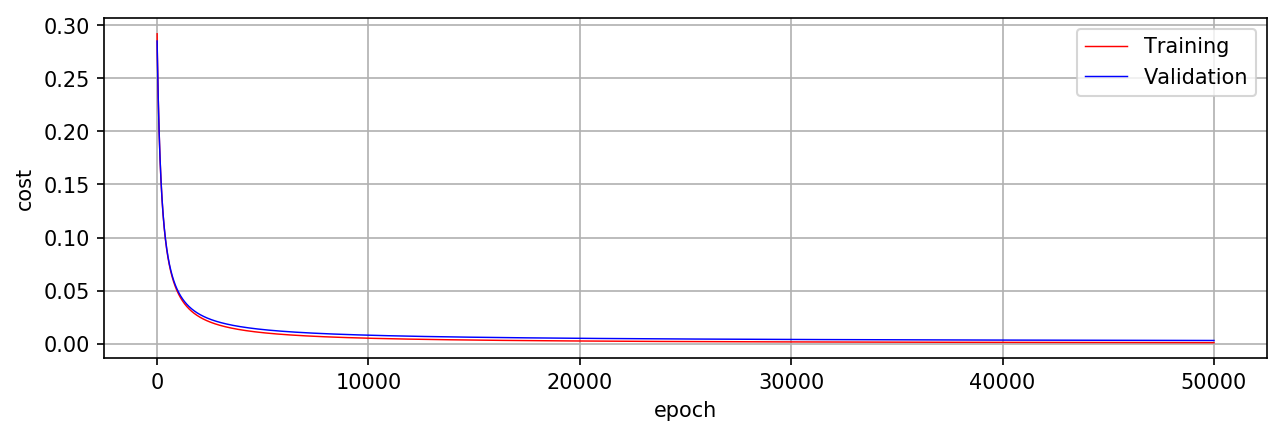

In [201]:
plt.figure(figsize = [10,3], dpi=150)
plt.plot(np.arange(num_of_iters+1), COST, 'r-', label = "Training", lw = 0.7)
plt.plot(np.arange(num_of_iters+1), VAL, 'b-', label = "Validation", lw = 0.7)
plt.ylabel("cost")
plt.xlabel("epoch")
plt.legend()
plt.grid()

C:\Users\renep\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log
C:\Users\renep\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in multiply


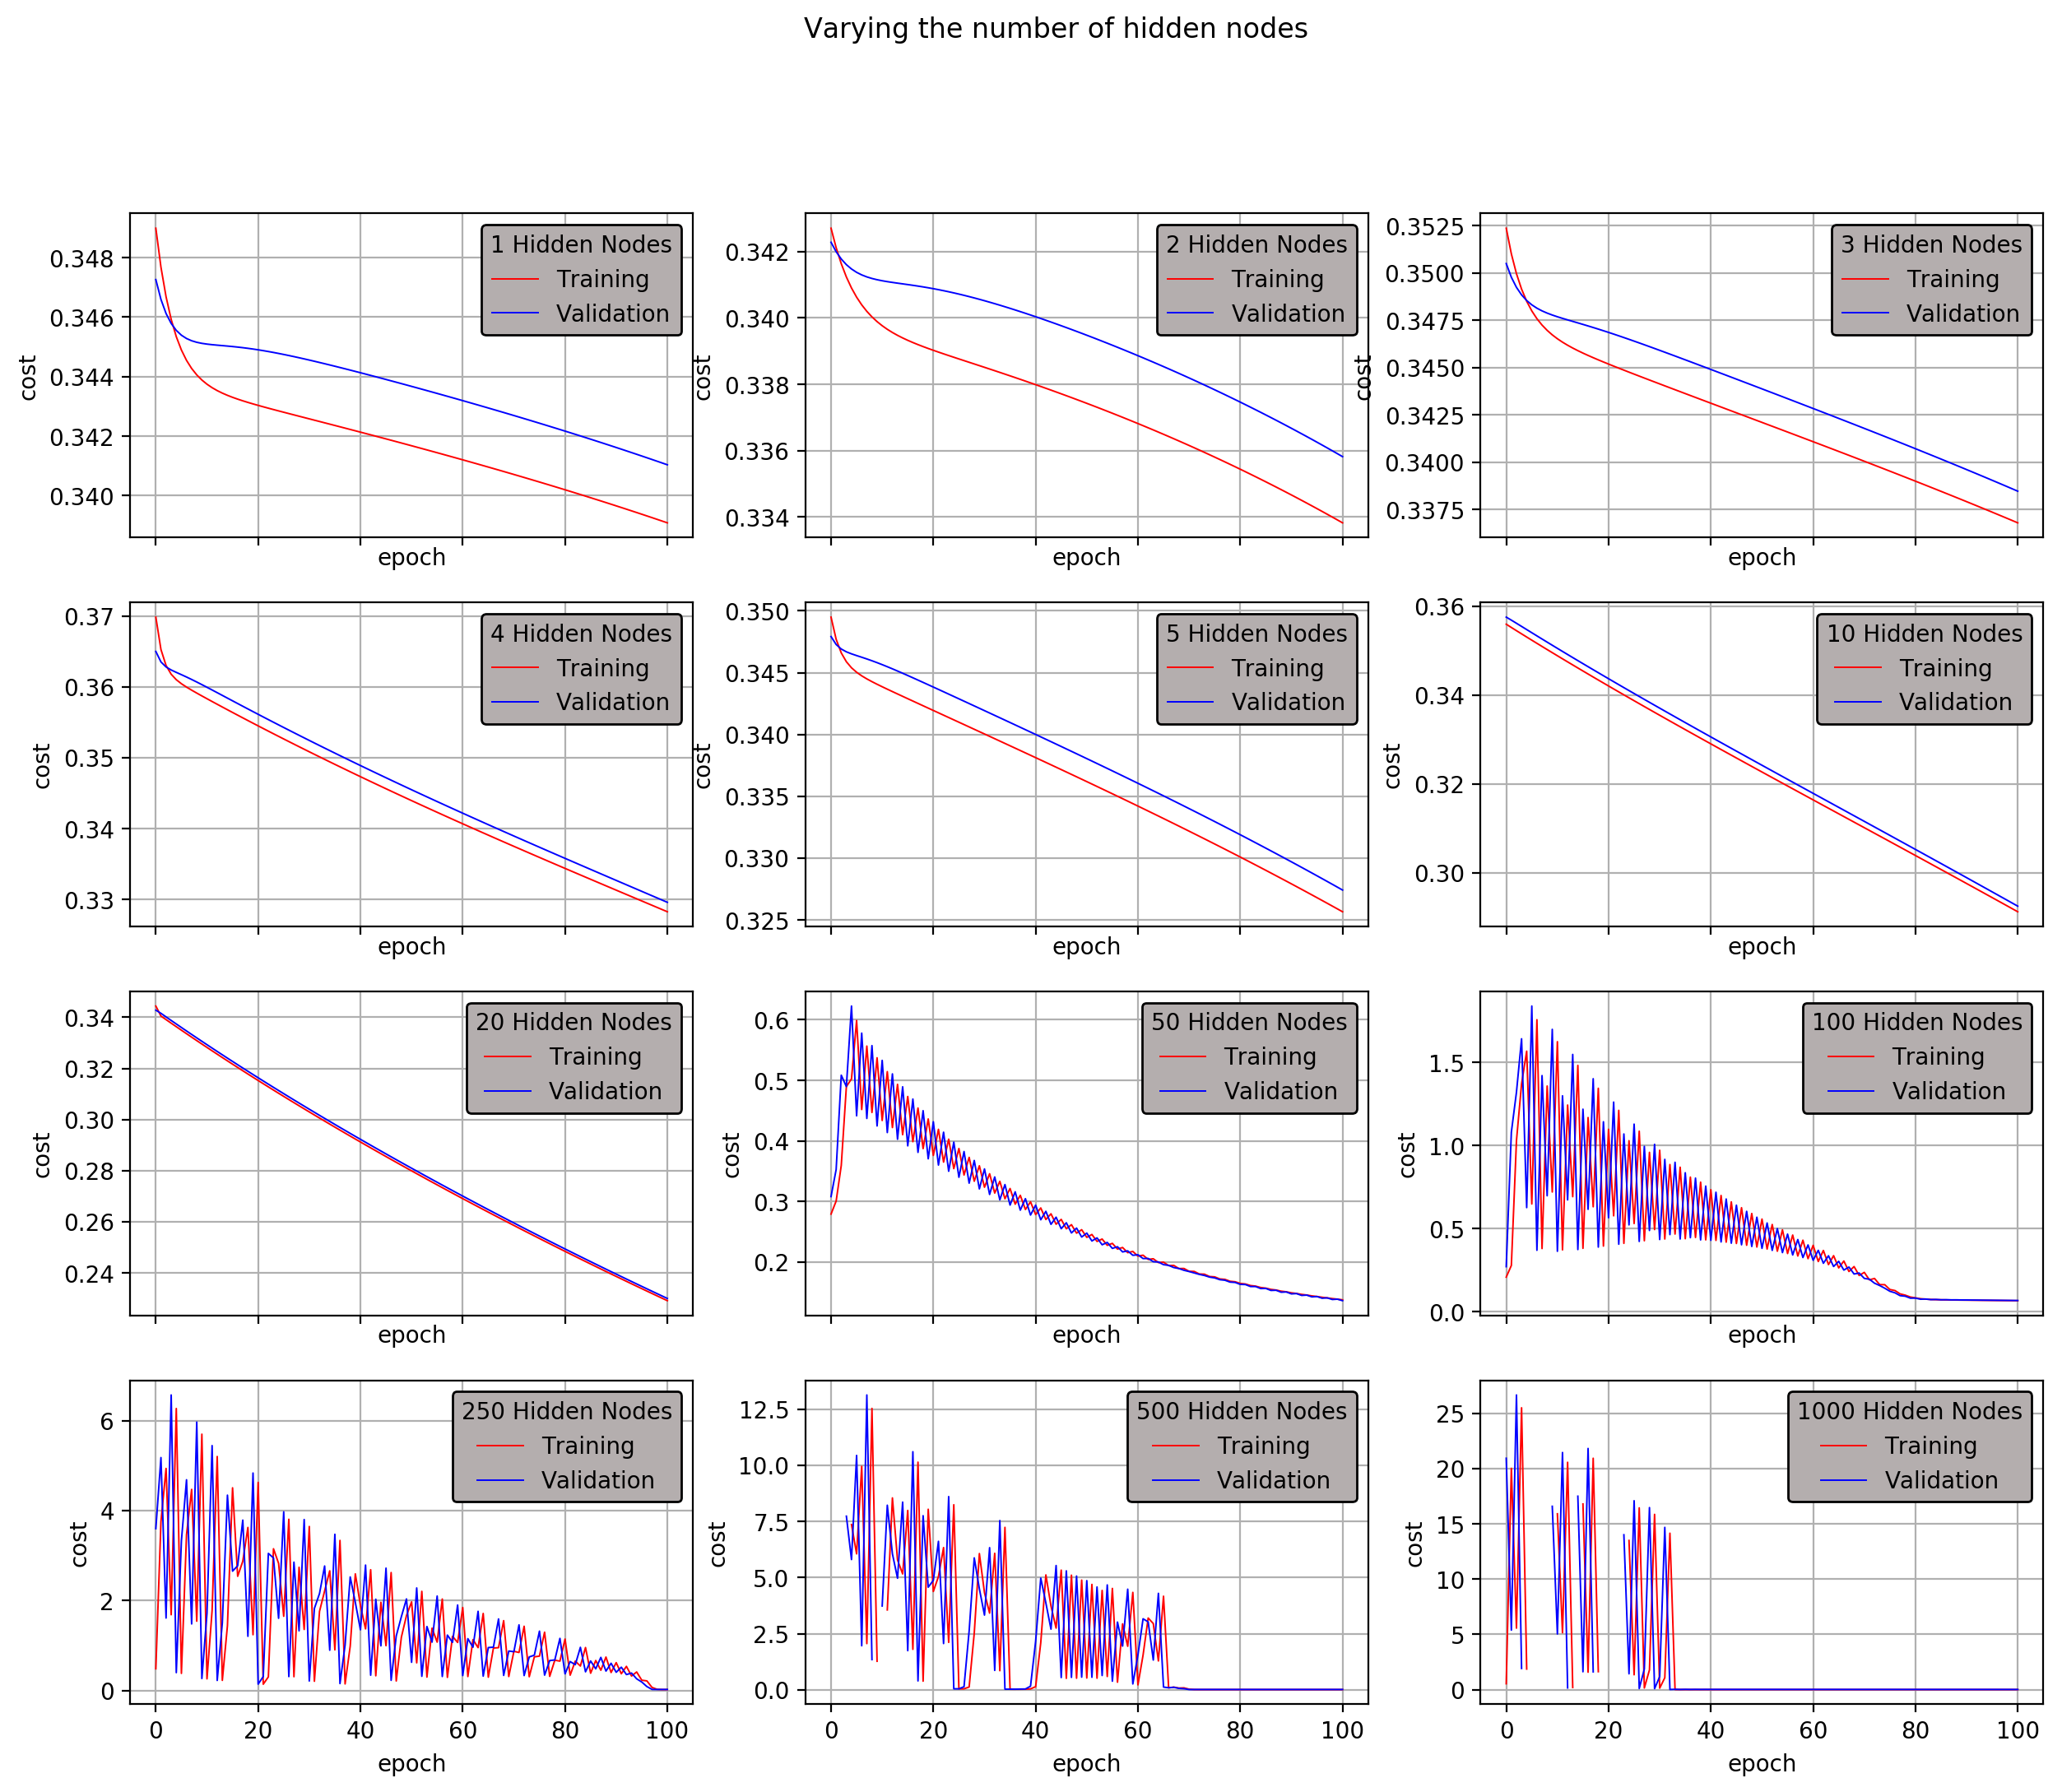

In [24]:
fig, axes = plt.subplots(4,3, figsize=(15,12), sharex=True, sharey=False, dpi=200, facecolor = 'w')

#HIDDEN = np.arange(1,101,10)
HIDDEN = [1,2,3,4,5,10,20,50,100,250,500,1000]
num_of_iters = 100

for i, ax in enumerate(axes.ravel()):
    plt.suptitle("Varying the number of hidden nodes")

    n_h = HIDDEN[i]
    trained_parameters, COST, VAL = model(x_test.T, y_test, n_x, n_h, n_y, num_of_iters, learning_rate)
    ax.plot(np.arange(num_of_iters+1), COST, 'r-', label = "Training", lw = 0.7)
    ax.plot(np.arange(num_of_iters+1), VAL, 'b-', label = "Validation", lw = 0.7)
    ax.set_ylabel("cost")
    ax.set_xlabel("epoch")
    ax.grid()
    
    
    legend = ax.legend(bbox_to_anchor=(1,1), fancybox = True, title = str(n_h) + " Hidden Nodes")
    frame = legend.get_frame() #sets up for color, edge, and transparency
    frame.set_facecolor('#b4aeae') #color of legend
    frame.set_edgecolor('black') #edge color of legend
    frame.set_alpha(1) #deals with transparency
    fig.savefig("Varying the Hidden Nodes.png")


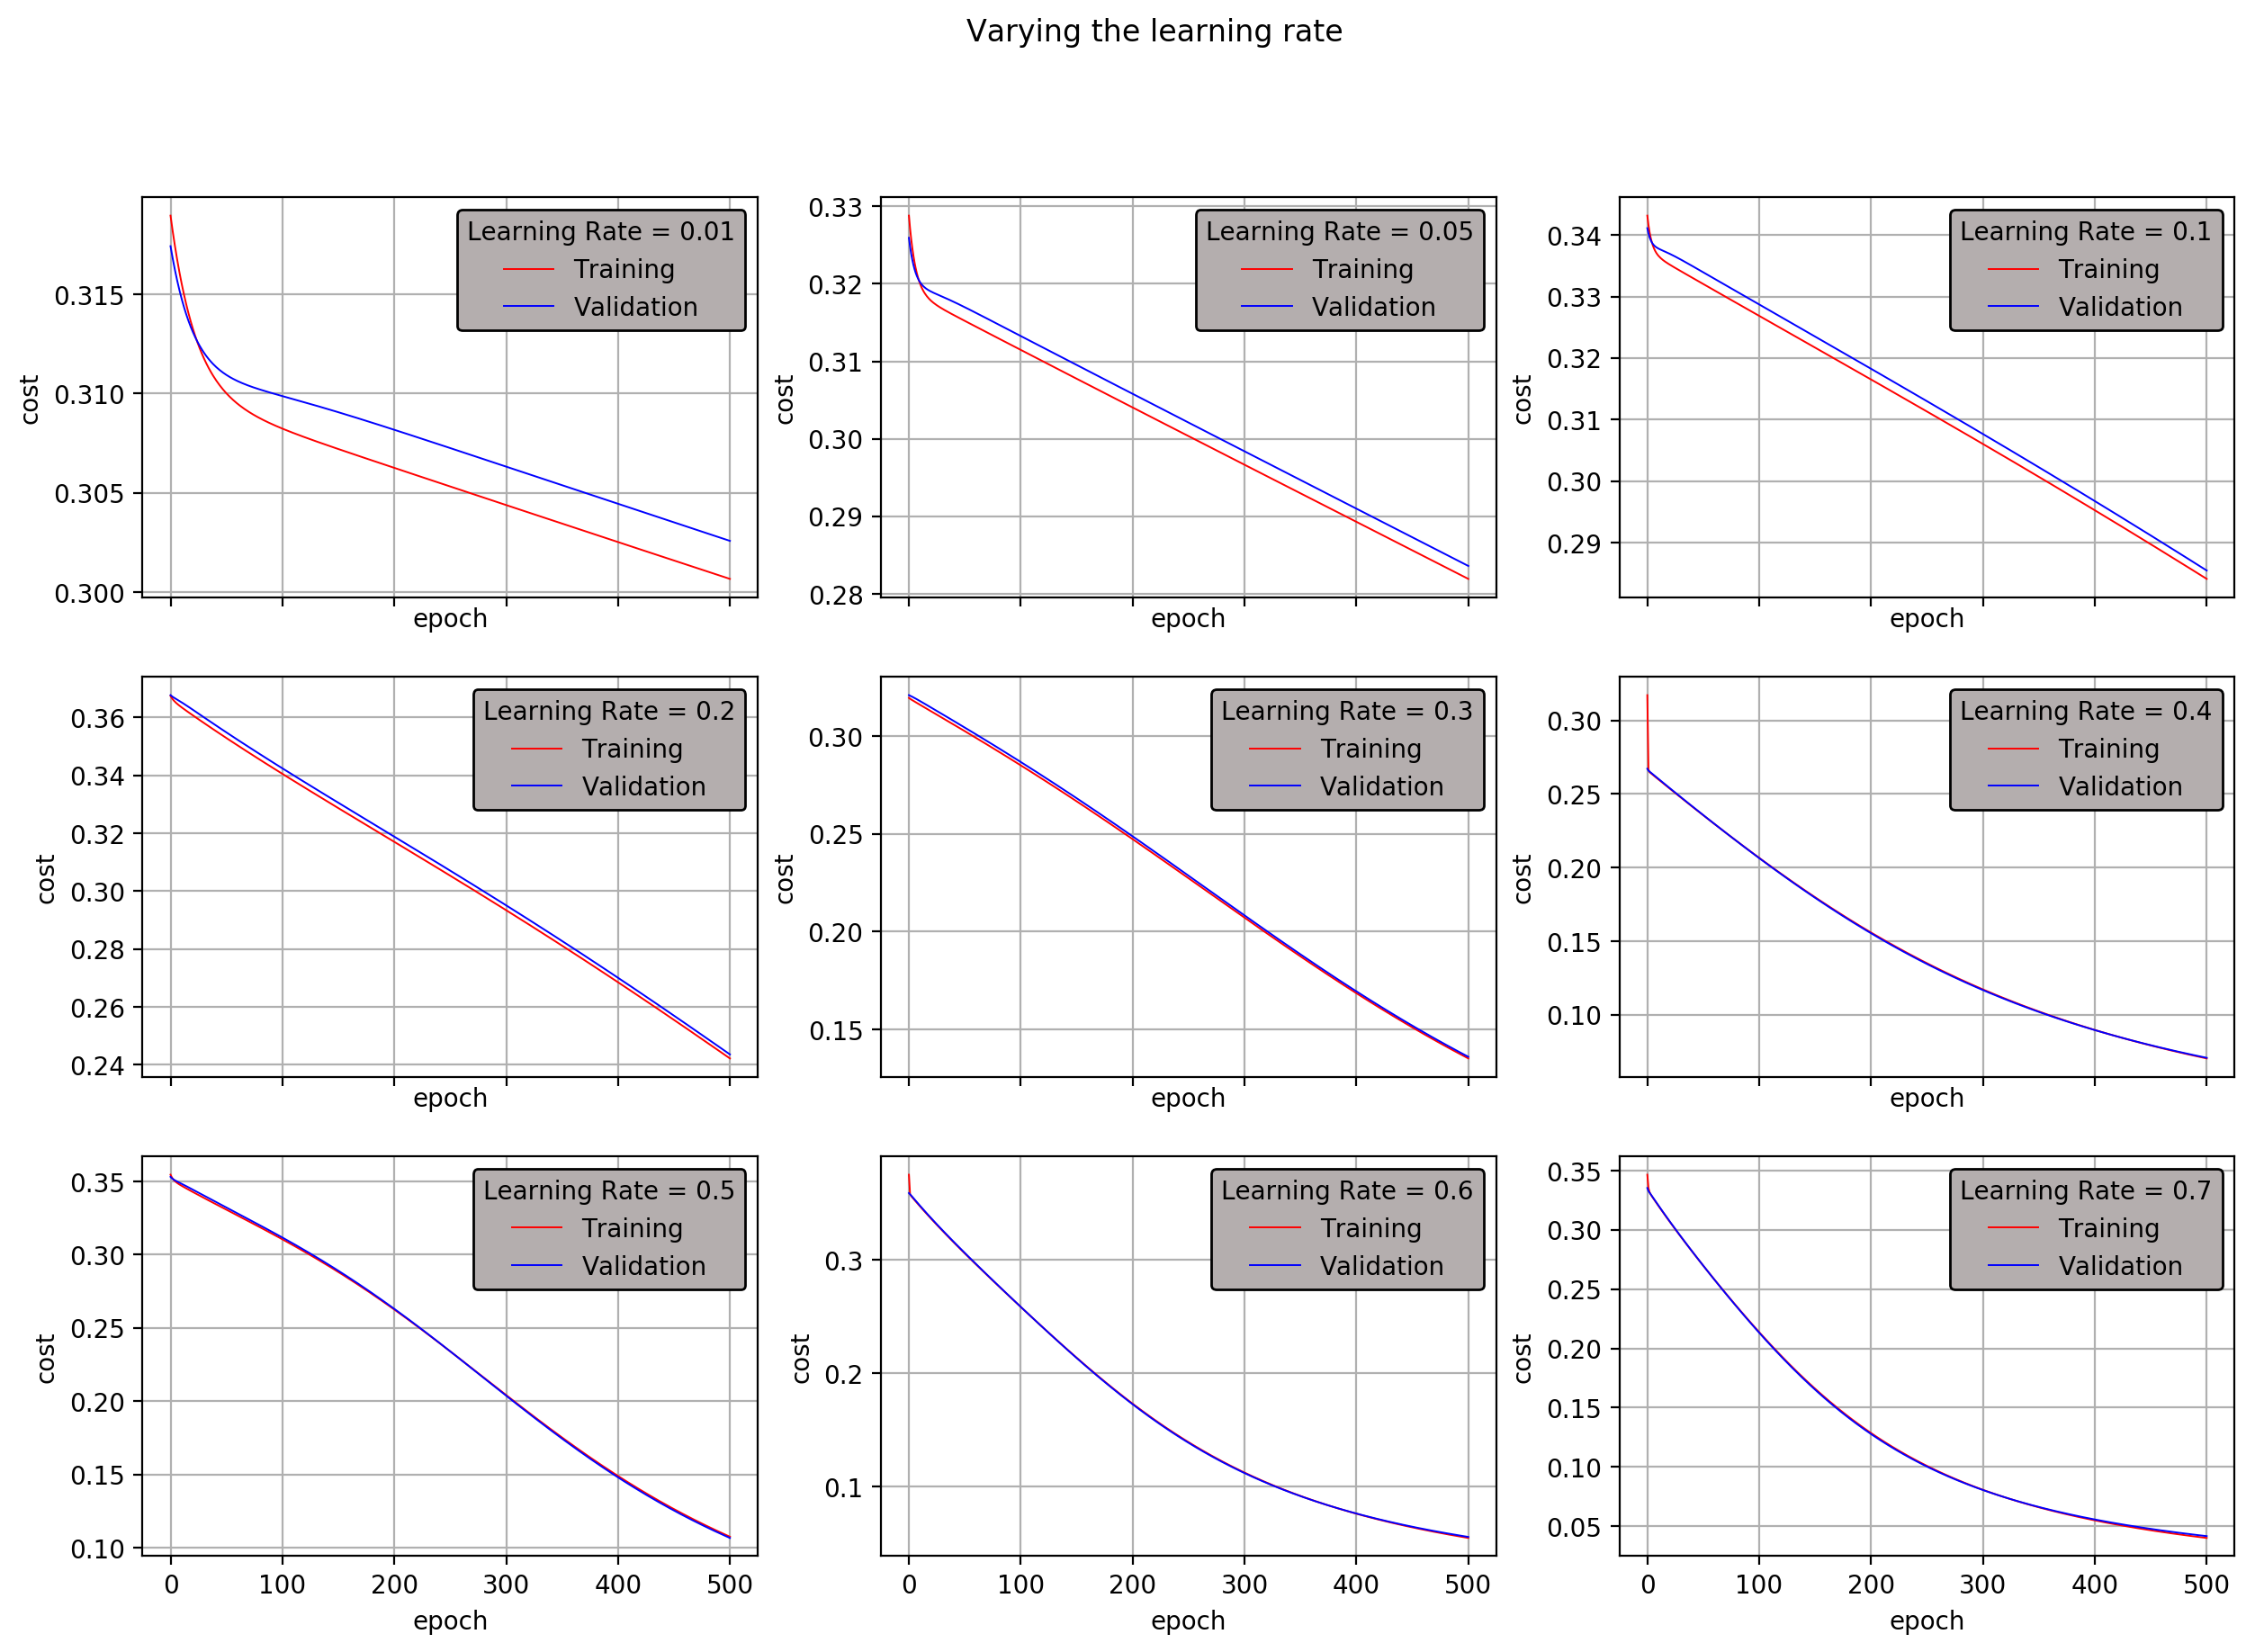

In [362]:
fig, axes = plt.subplots(3,3, figsize=(15,10), sharex=True, sharey=False, dpi=200, facecolor = 'w')

LR = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7]
num_of_iters = 500
n_h = 10

for i, ax in enumerate(axes.ravel()):
    plt.suptitle("Varying the learning rate")
    learning_rate = LR[i]
    trained_parameters, COST, VAL = model(x_test.T, y_test, n_x, n_h, n_y, num_of_iters, learning_rate)
    ax.plot(np.arange(num_of_iters+1), COST, 'r-', label = "Training", lw = 0.7)
    ax.plot(np.arange(num_of_iters+1), VAL, 'b-', label = "Validation", lw = 0.7)
    ax.set_ylabel("cost")
    ax.set_xlabel("epoch")
    ax.grid()
    
    legend = ax.legend(bbox_to_anchor=(1,1), fancybox = True, title = "Learning Rate = " + str(learning_rate))
    frame = legend.get_frame() #sets up for color, edge, and transparency
    frame.set_facecolor('#b4aeae') #color of legend
    frame.set_edgecolor('black') #edge color of legend
    frame.set_alpha(1) #deals with transparency
    fig.savefig("Varying the Learning Rate.png")


https://towardsdatascience.com/how-to-build-a-simple-neural-network-from-scratch-with-python-9f011896d2f3

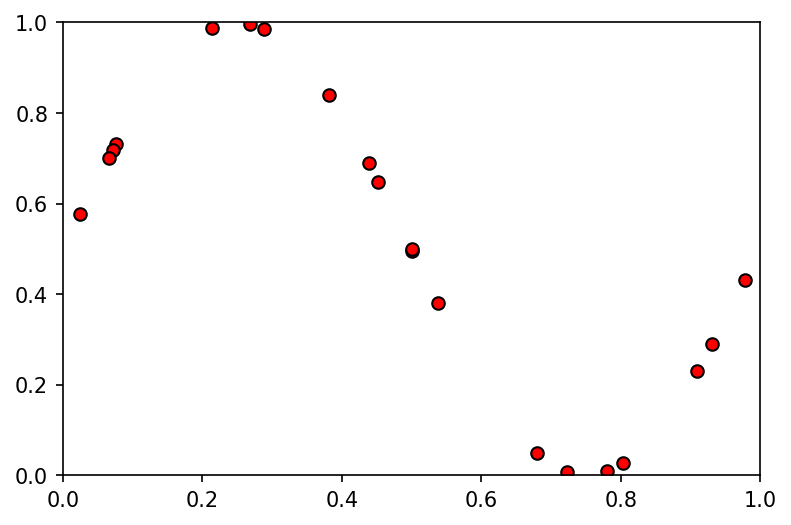

In [204]:
plt.figure(dpi = 150)
np.random.seed(7)
n = 20
x_train = np.array([np.random.ranf(n)])
y_train = (np.sin(x_train*2*np.pi)+1)/2
plt.plot(x_train, y_train, 'ro', mec = 'k')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [187]:
n_x = 1
n_h = 5000
n_y = 1
num_of_iters = 10000
learning_rate = 0.01

def regression(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate):

  COST = []
  #VAL = []
    
  parameters = initialize_parameters(n_x, n_h, n_y)

  for i in range(0, num_of_iters+1):
    a2, cache = forward_prop(X, parameters)

    cost = calculate_cost(a2, Y)
    COST.append(cost)

    grads = backward_prop(X, Y, cache, parameters)

    parameters = update_parameters(parameters, grads, learning_rate)

    
    if(i%100 == 0):
      print('Cost after iteration# {:d}: {:f}'.format(i, cost))

  return parameters, COST

def predict_regression(X, parameters):
  a2, cache = forward_prop(X, parameters)
  yhat = a2
  yhat = np.squeeze(yhat)
  return yhat

In [188]:
n_x = 1
n_h = 5000
n_y = 1
num_of_iters = 1000
learning_rate = 0.01

def Curve_Fit_NN(x_train, y_train, n_x, n_h, n_y, num_of_iters, learning_rate):
    parameters, COST = regression(x_train, y_train, n_x, n_h, n_y, num_of_iters, learning_rate)
    plt.figure(figsize = [13,6], dpi=200, facecolor = 'w')
    plt.suptitle("PARAMETERS: $nodes_{hidden}$ = " + str(n_h) + ", Iterations = " + str(num_of_iters) + ", LR = " + str(learning_rate))
    plt.subplot(121)
    plt.plot(np.arange(num_of_iters+1), COST, 'r-', label = "Training", lw = 0.7)
    plt.ylabel("cost")
    plt.xlabel("epoch")
    plt.legend()
    plt.grid()
    plt.title("Training")
    plt.subplot(122)
    t = np.array([np.linspace(0,1,1000)])
    y_act = (np.sin(t[0]*2*np.pi)+1)/2
    y_pred = predict_regression(t, parameters)
    plt.plot(t[0],y_act, 'r-')
    plt.plot(t[0],y_pred, 'b-')
    plt.plot(x_train, y_train, 'go')
    plt.title("Prediction")
    plt.legend(["Sine Wave", "Best Fit", "Training Points"])
    plt.grid()
    plt.show()

C:\Users\renep\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


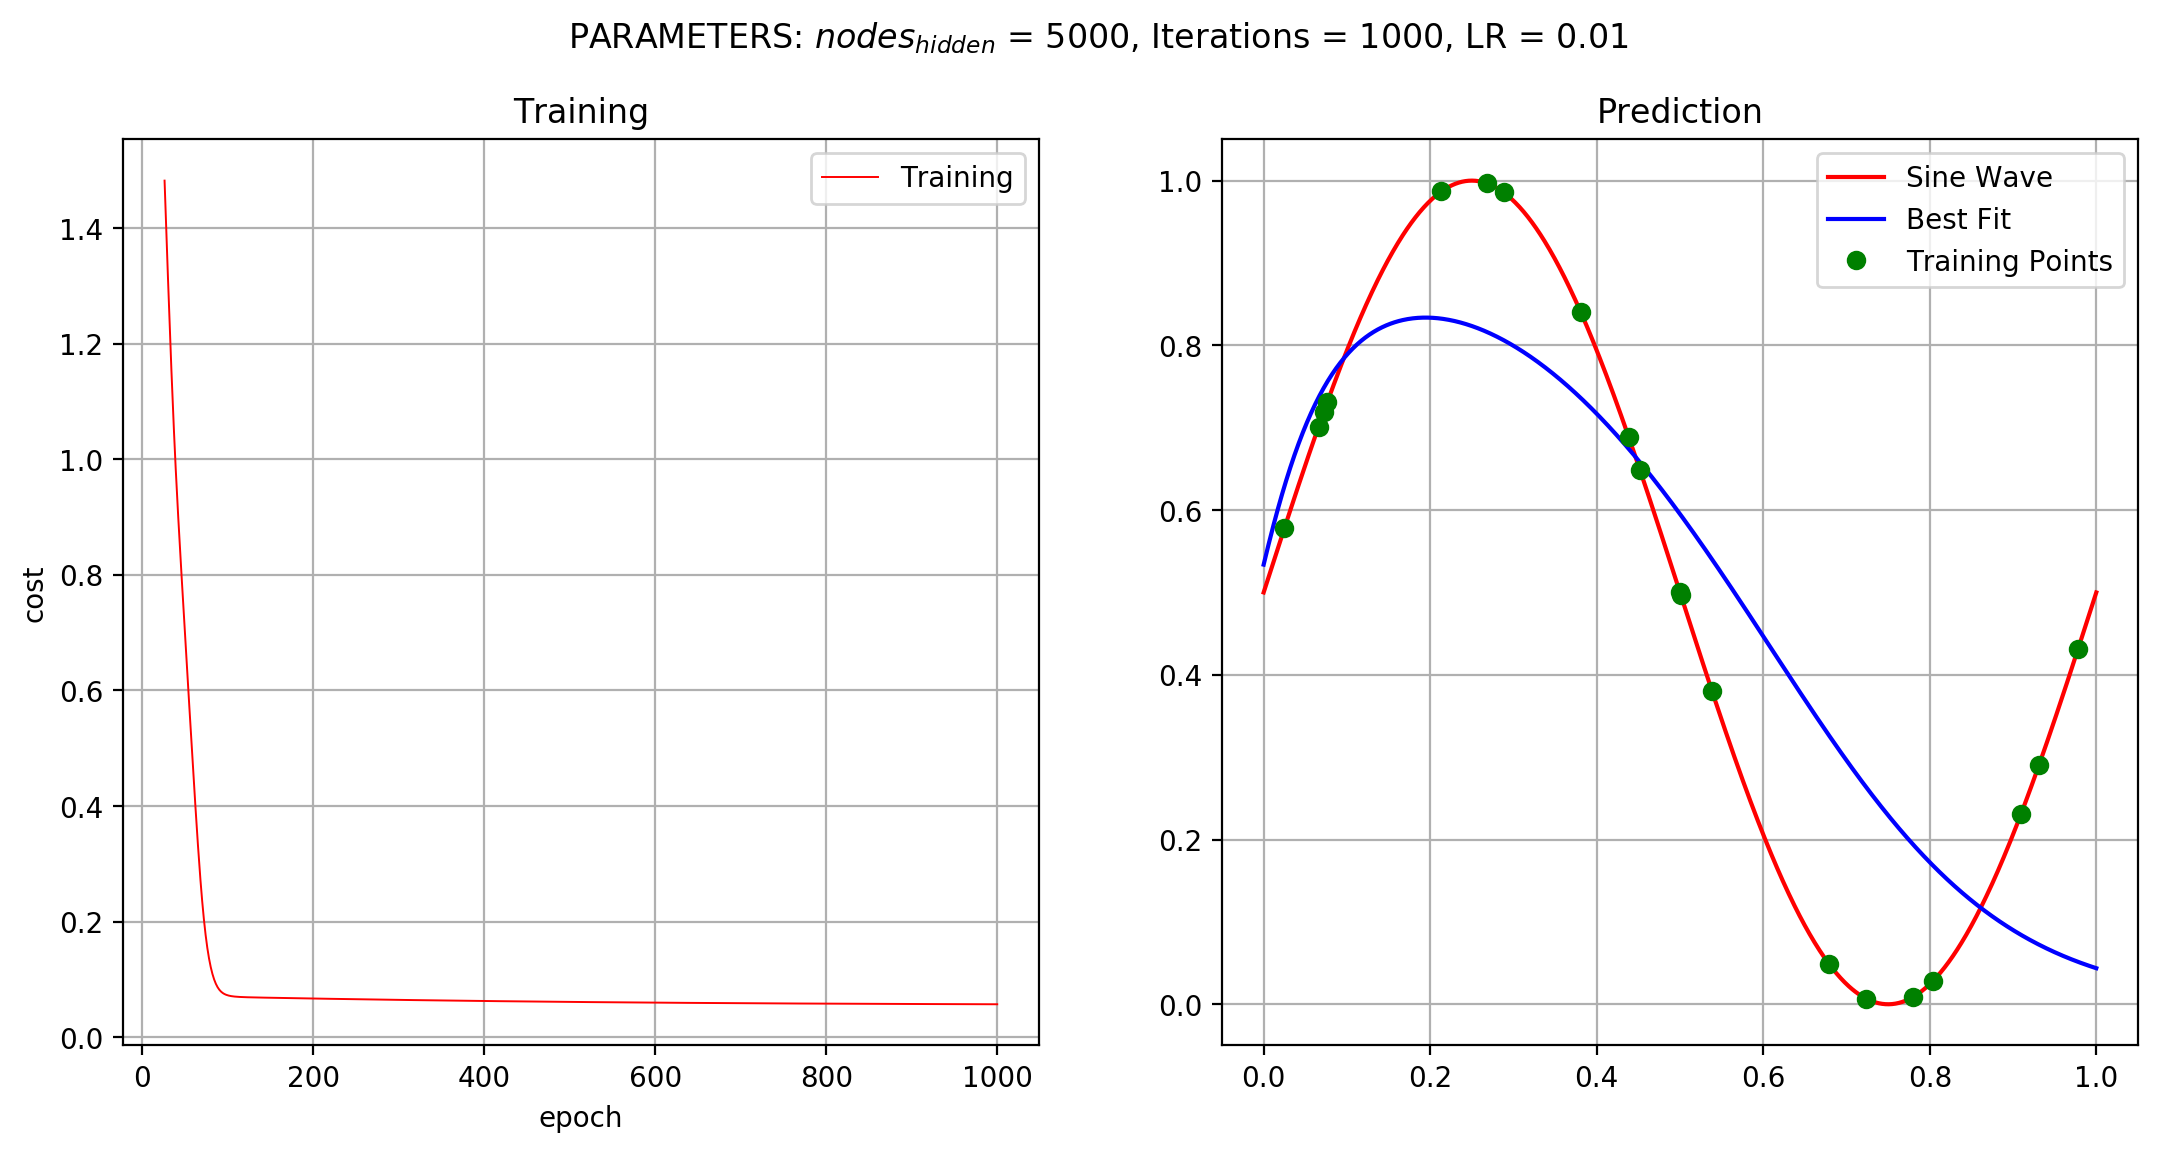

In [181]:
Curve_Fit_NN(x_train, y_train, 1, 5000, 1, 1000, 0.01)

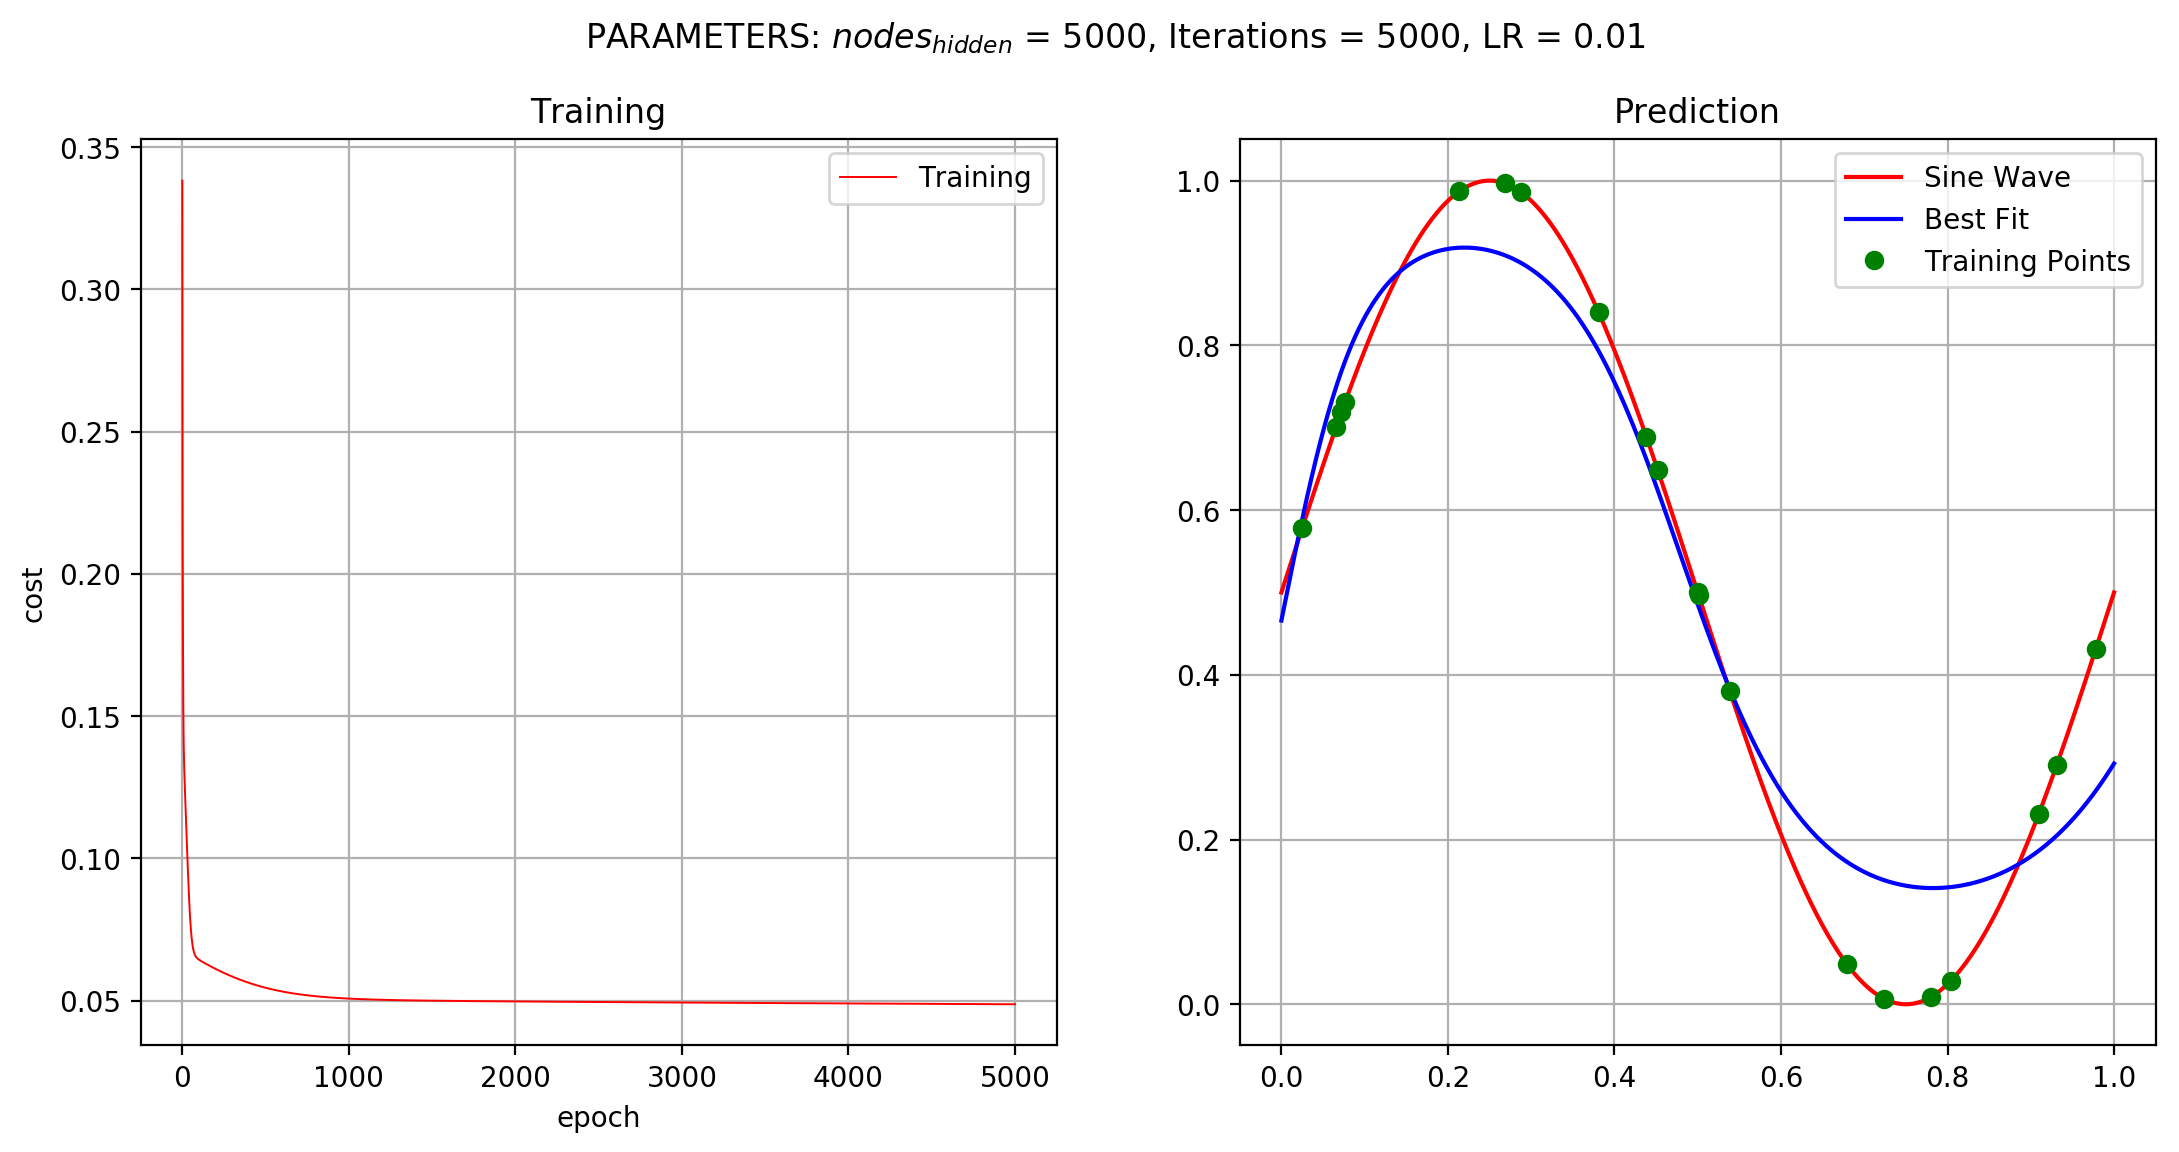

In [182]:
Curve_Fit_NN(x_train, y_train, 1, 5000, 1, 5000, 0.01)

Cost after iteration# 0: 0.227998
Cost after iteration# 100: 0.061334
Cost after iteration# 200: 0.059046
Cost after iteration# 300: 0.058787
Cost after iteration# 400: 0.058673
Cost after iteration# 500: 0.058570
Cost after iteration# 600: 0.058472
Cost after iteration# 700: 0.058379
Cost after iteration# 800: 0.058291
Cost after iteration# 900: 0.058206
Cost after iteration# 1000: 0.058126


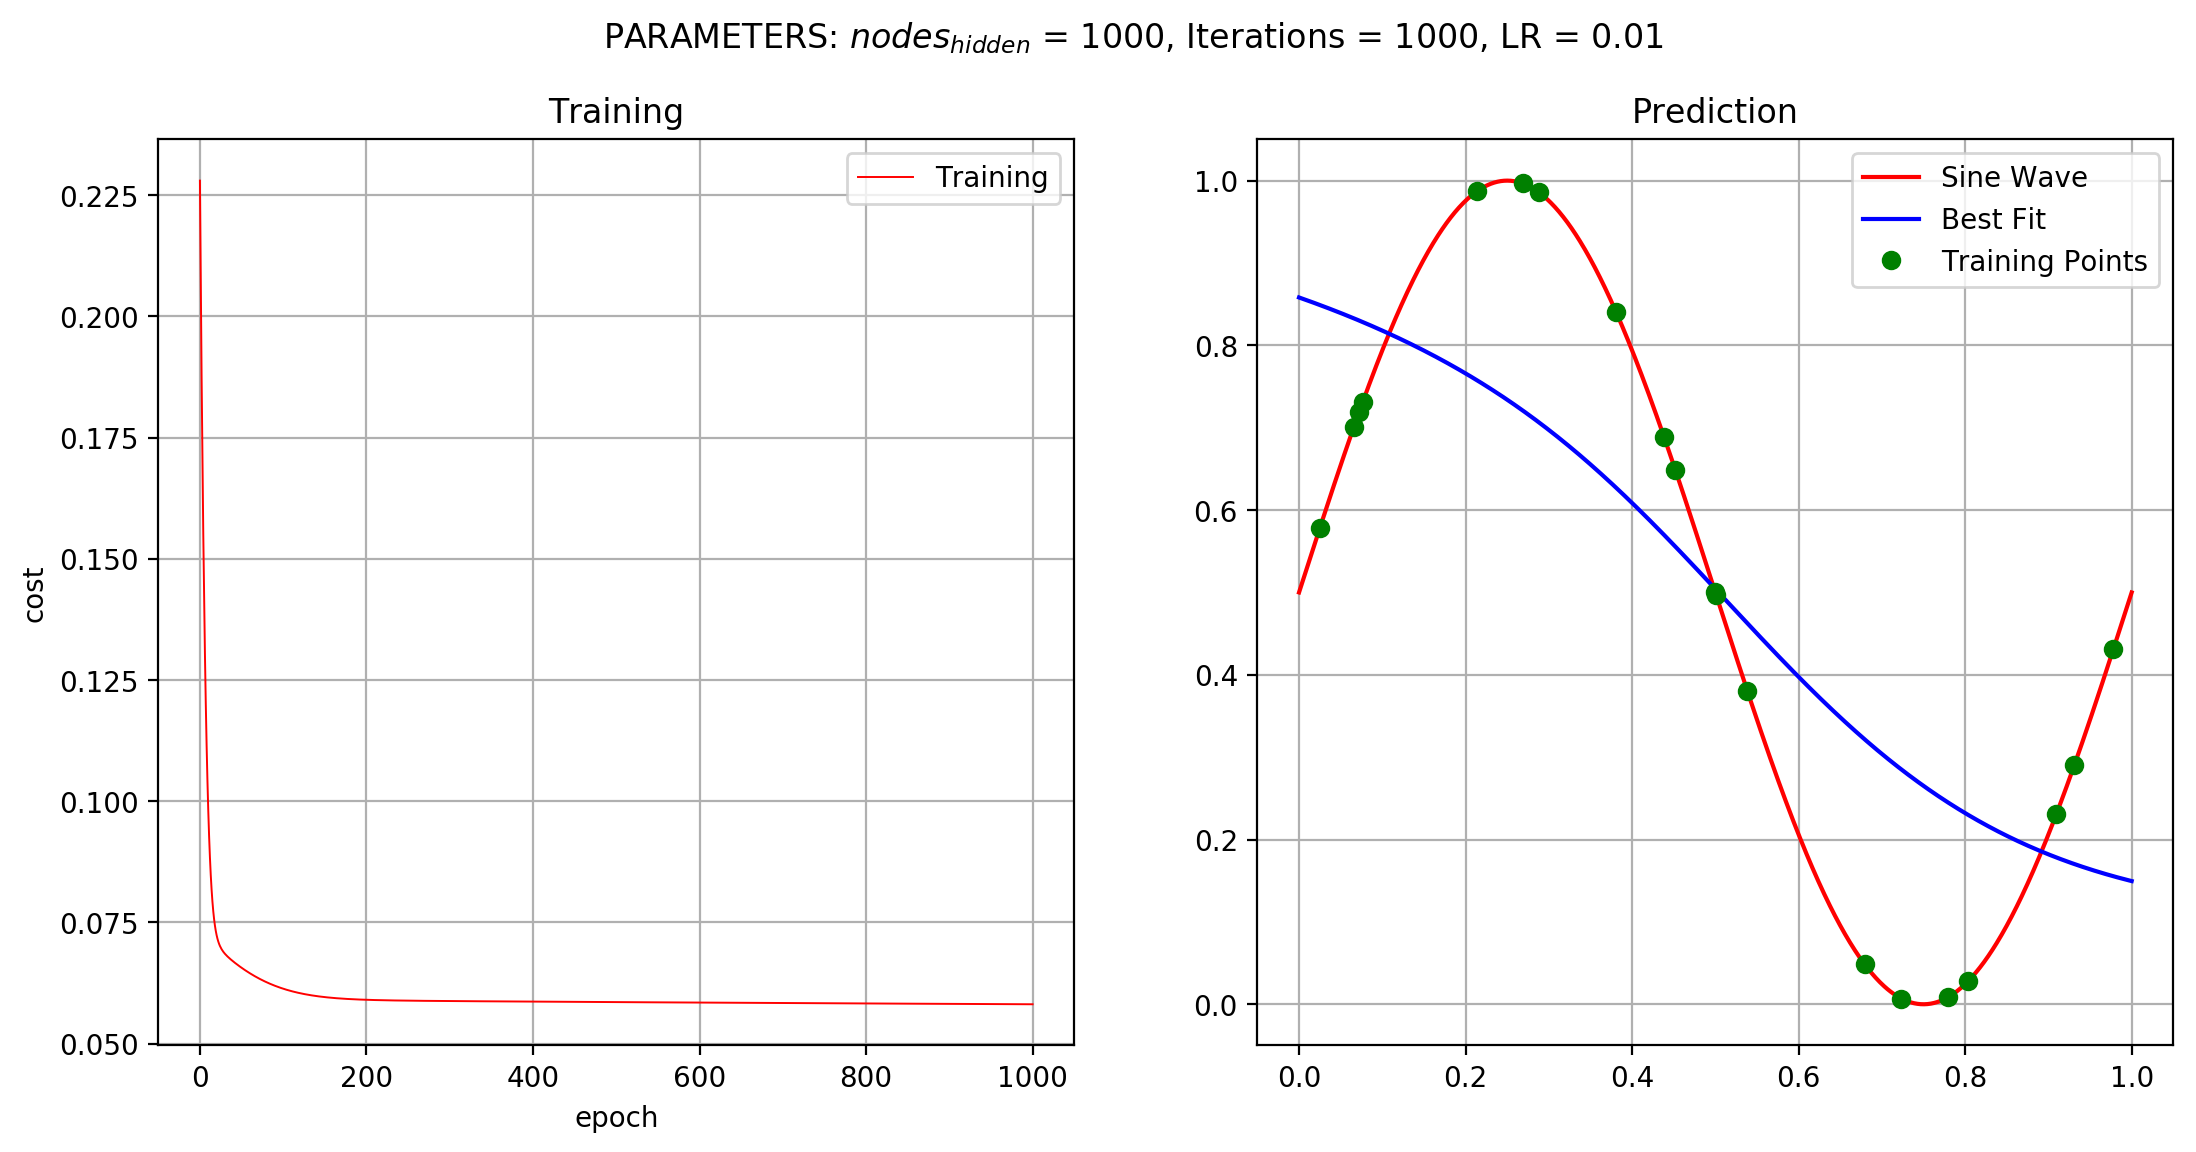

In [189]:
Curve_Fit_NN(x_train, y_train, 1, 1000, 1, 1000, 0.01)

Cost after iteration# 0: 3.434705


C:\Users\renep\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


Cost after iteration# 100: inf
Cost after iteration# 200: 0.164499
Cost after iteration# 300: 0.146019
Cost after iteration# 400: 0.129696
Cost after iteration# 500: 0.115641
Cost after iteration# 600: 0.103884
Cost after iteration# 700: 0.094288
Cost after iteration# 800: 0.086635
Cost after iteration# 900: 0.080727
Cost after iteration# 1000: 0.076379
Cost after iteration# 1100: 0.073322
Cost after iteration# 1200: 0.071208
Cost after iteration# 1300: 0.069706
Cost after iteration# 1400: 0.068578
Cost after iteration# 1500: 0.067672
Cost after iteration# 1600: 0.066898
Cost after iteration# 1700: 0.066206
Cost after iteration# 1800: 0.065567
Cost after iteration# 1900: 0.064965
Cost after iteration# 2000: 0.064390
Cost after iteration# 2100: 0.063838
Cost after iteration# 2200: 0.063305
Cost after iteration# 2300: 0.062791
Cost after iteration# 2400: 0.062293
Cost after iteration# 2500: 0.061812
Cost after iteration# 2600: 0.061346
Cost after iteration# 2700: 0.060895
Cost after iter

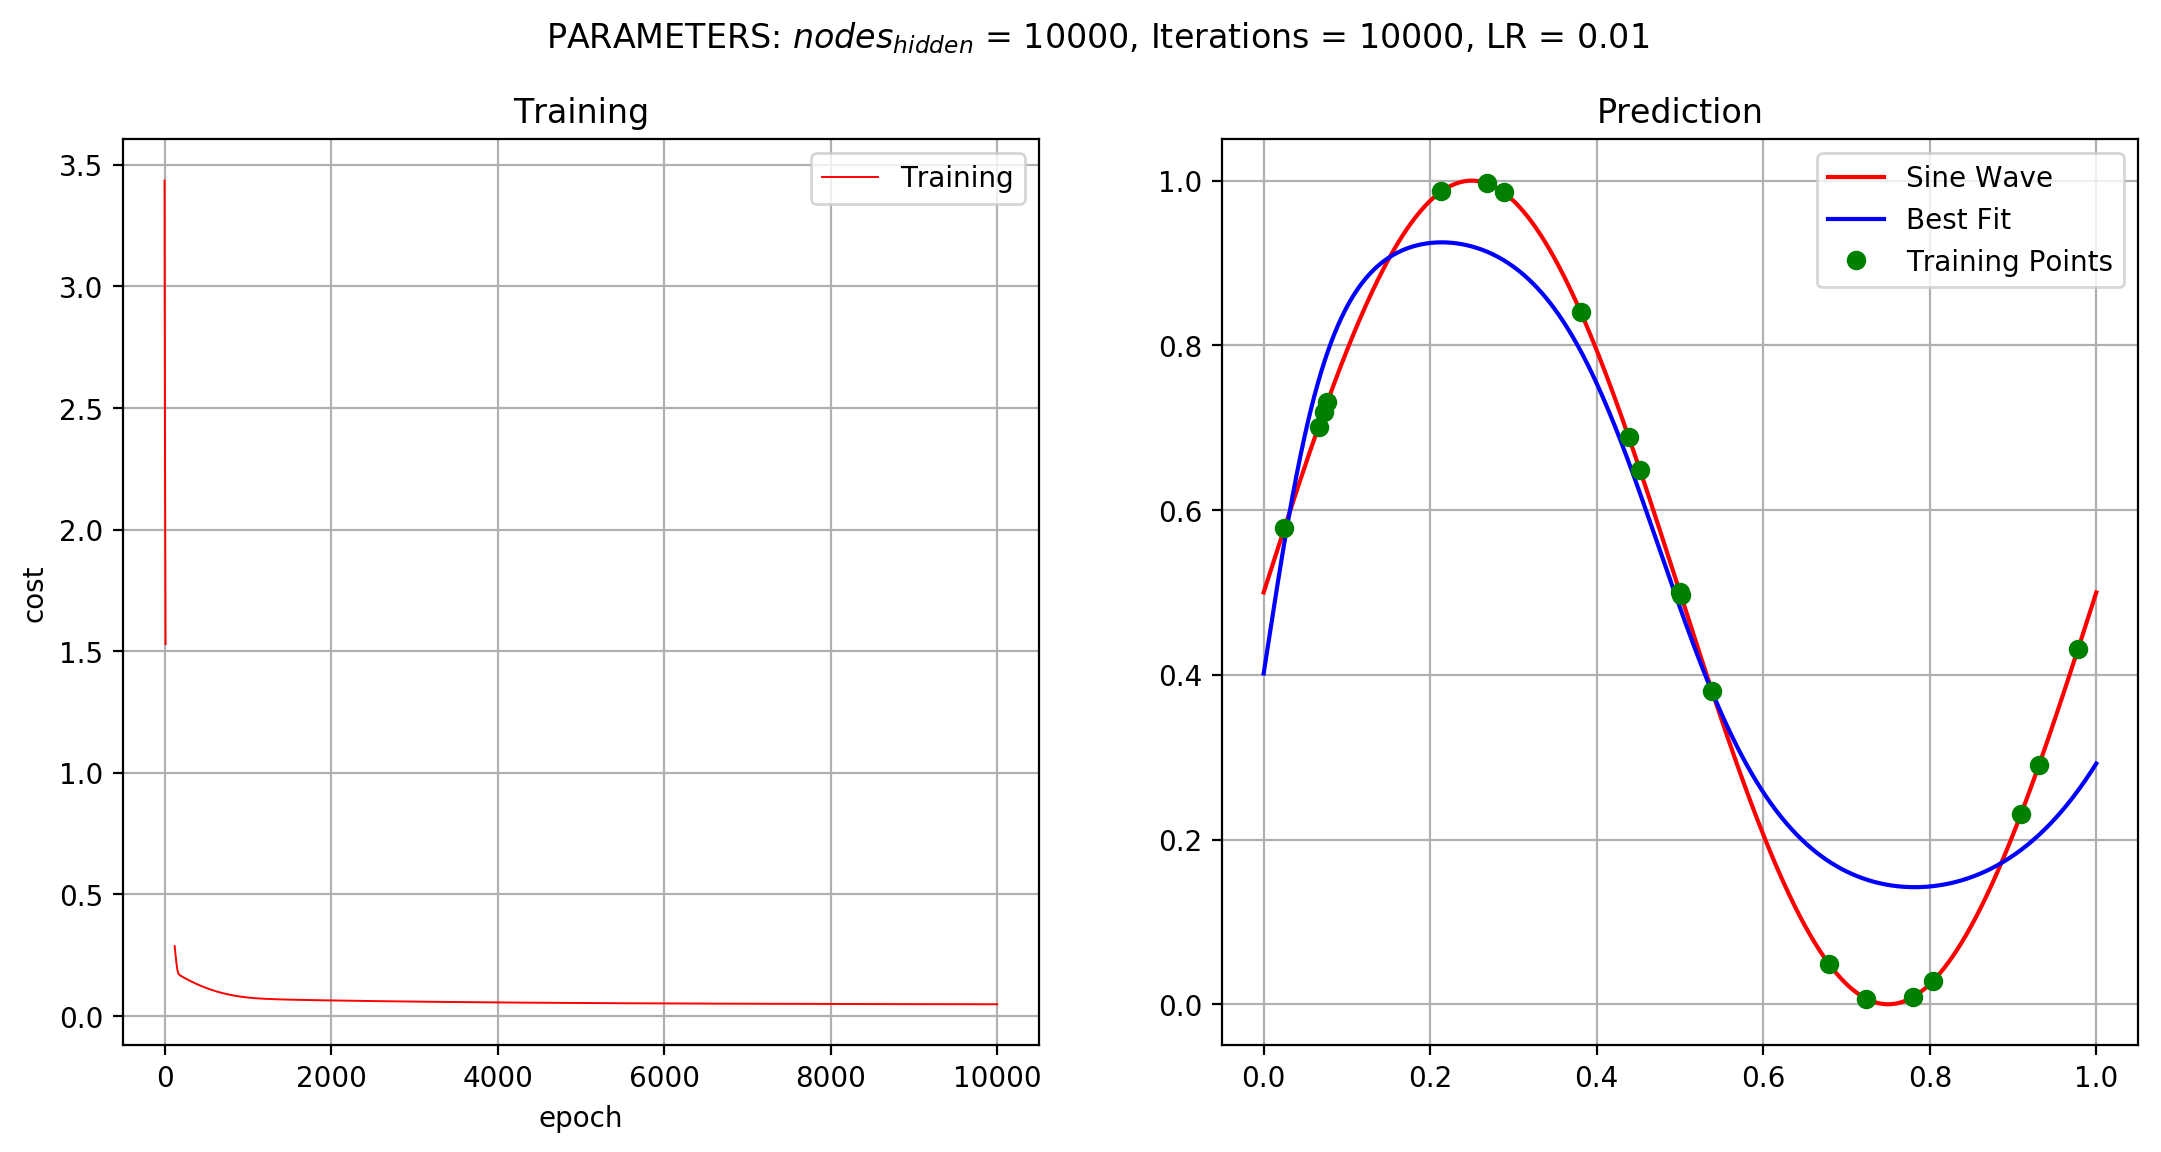

In [190]:
Curve_Fit_NN(x_train, y_train, 1, 10000, 1, 10000, 0.01)

Cost after iteration# 0: 0.648477
Cost after iteration# 100: 0.091231
Cost after iteration# 200: 0.078199
Cost after iteration# 300: 0.068704
Cost after iteration# 400: 0.062877
Cost after iteration# 500: 0.059788
Cost after iteration# 600: 0.058200
Cost after iteration# 700: 0.057319
Cost after iteration# 800: 0.056755
Cost after iteration# 900: 0.056335
Cost after iteration# 1000: 0.055986
Cost after iteration# 1100: 0.055672
Cost after iteration# 1200: 0.055380
Cost after iteration# 1300: 0.055103
Cost after iteration# 1400: 0.054838
Cost after iteration# 1500: 0.054584
Cost after iteration# 1600: 0.054338
Cost after iteration# 1700: 0.054102
Cost after iteration# 1800: 0.053874
Cost after iteration# 1900: 0.053655
Cost after iteration# 2000: 0.053443
Cost after iteration# 2100: 0.053239
Cost after iteration# 2200: 0.053042
Cost after iteration# 2300: 0.052851
Cost after iteration# 2400: 0.052668
Cost after iteration# 2500: 0.052491
Cost after iteration# 2600: 0.052320
Cost after it

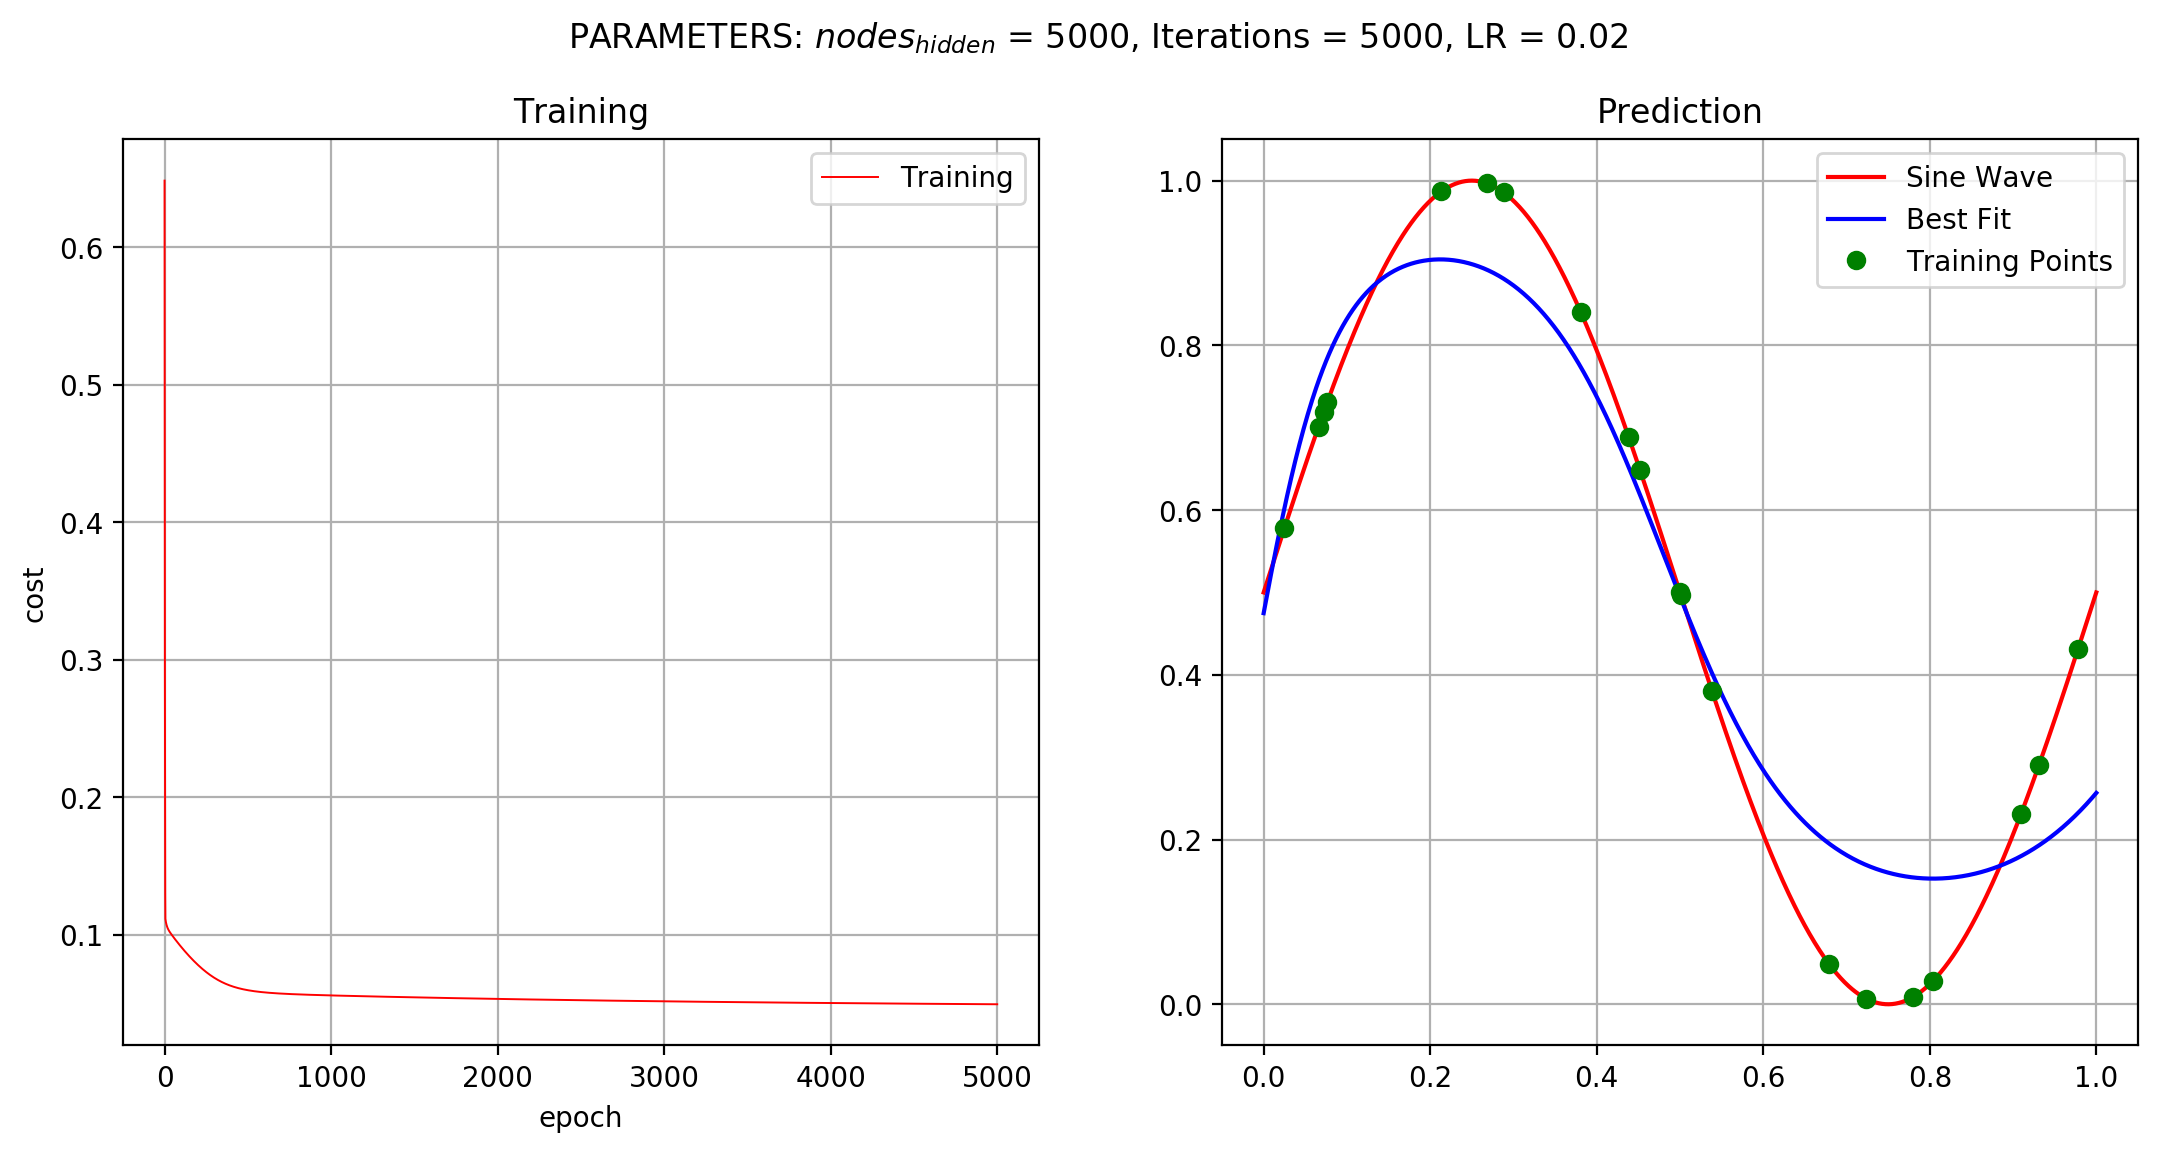

In [192]:
Curve_Fit_NN(x_train, y_train, 1, 5000, 1, 5000, 0.02)

Cost after iteration# 0: 0.559601
Cost after iteration# 100: 0.053126
Cost after iteration# 200: 0.052818
Cost after iteration# 300: 0.052588
Cost after iteration# 400: 0.052393
Cost after iteration# 500: 0.052215
Cost after iteration# 600: 0.052049
Cost after iteration# 700: 0.051890
Cost after iteration# 800: 0.051737
Cost after iteration# 900: 0.051590
Cost after iteration# 1000: 0.051448
Cost after iteration# 1100: 0.051311
Cost after iteration# 1200: 0.051178
Cost after iteration# 1300: 0.051051
Cost after iteration# 1400: 0.050927
Cost after iteration# 1500: 0.050808
Cost after iteration# 1600: 0.050693
Cost after iteration# 1700: 0.050582
Cost after iteration# 1800: 0.050474
Cost after iteration# 1900: 0.050371
Cost after iteration# 2000: 0.050270
Cost after iteration# 2100: 0.050173
Cost after iteration# 2200: 0.050079
Cost after iteration# 2300: 0.049988
Cost after iteration# 2400: 0.049900
Cost after iteration# 2500: 0.049815
Cost after iteration# 2600: 0.049732
Cost after it

Cost after iteration# 21800: 0.046722
Cost after iteration# 21900: 0.046720
Cost after iteration# 22000: 0.046718
Cost after iteration# 22100: 0.046716
Cost after iteration# 22200: 0.046715
Cost after iteration# 22300: 0.046713
Cost after iteration# 22400: 0.046711
Cost after iteration# 22500: 0.046710
Cost after iteration# 22600: 0.046708
Cost after iteration# 22700: 0.046707
Cost after iteration# 22800: 0.046705
Cost after iteration# 22900: 0.046703
Cost after iteration# 23000: 0.046702
Cost after iteration# 23100: 0.046700
Cost after iteration# 23200: 0.046699
Cost after iteration# 23300: 0.046697
Cost after iteration# 23400: 0.046696
Cost after iteration# 23500: 0.046694
Cost after iteration# 23600: 0.046693
Cost after iteration# 23700: 0.046691
Cost after iteration# 23800: 0.046690
Cost after iteration# 23900: 0.046688
Cost after iteration# 24000: 0.046687
Cost after iteration# 24100: 0.046685
Cost after iteration# 24200: 0.046684
Cost after iteration# 24300: 0.046682
Cost after i

Cost after iteration# 43300: 0.046497
Cost after iteration# 43400: 0.046496
Cost after iteration# 43500: 0.046496
Cost after iteration# 43600: 0.046495
Cost after iteration# 43700: 0.046494
Cost after iteration# 43800: 0.046493
Cost after iteration# 43900: 0.046493
Cost after iteration# 44000: 0.046492
Cost after iteration# 44100: 0.046491
Cost after iteration# 44200: 0.046490
Cost after iteration# 44300: 0.046490
Cost after iteration# 44400: 0.046489
Cost after iteration# 44500: 0.046488
Cost after iteration# 44600: 0.046487
Cost after iteration# 44700: 0.046487
Cost after iteration# 44800: 0.046486
Cost after iteration# 44900: 0.046485
Cost after iteration# 45000: 0.046484
Cost after iteration# 45100: 0.046484
Cost after iteration# 45200: 0.046483
Cost after iteration# 45300: 0.046482
Cost after iteration# 45400: 0.046481
Cost after iteration# 45500: 0.046481
Cost after iteration# 45600: 0.046480
Cost after iteration# 45700: 0.046479
Cost after iteration# 45800: 0.046478
Cost after i

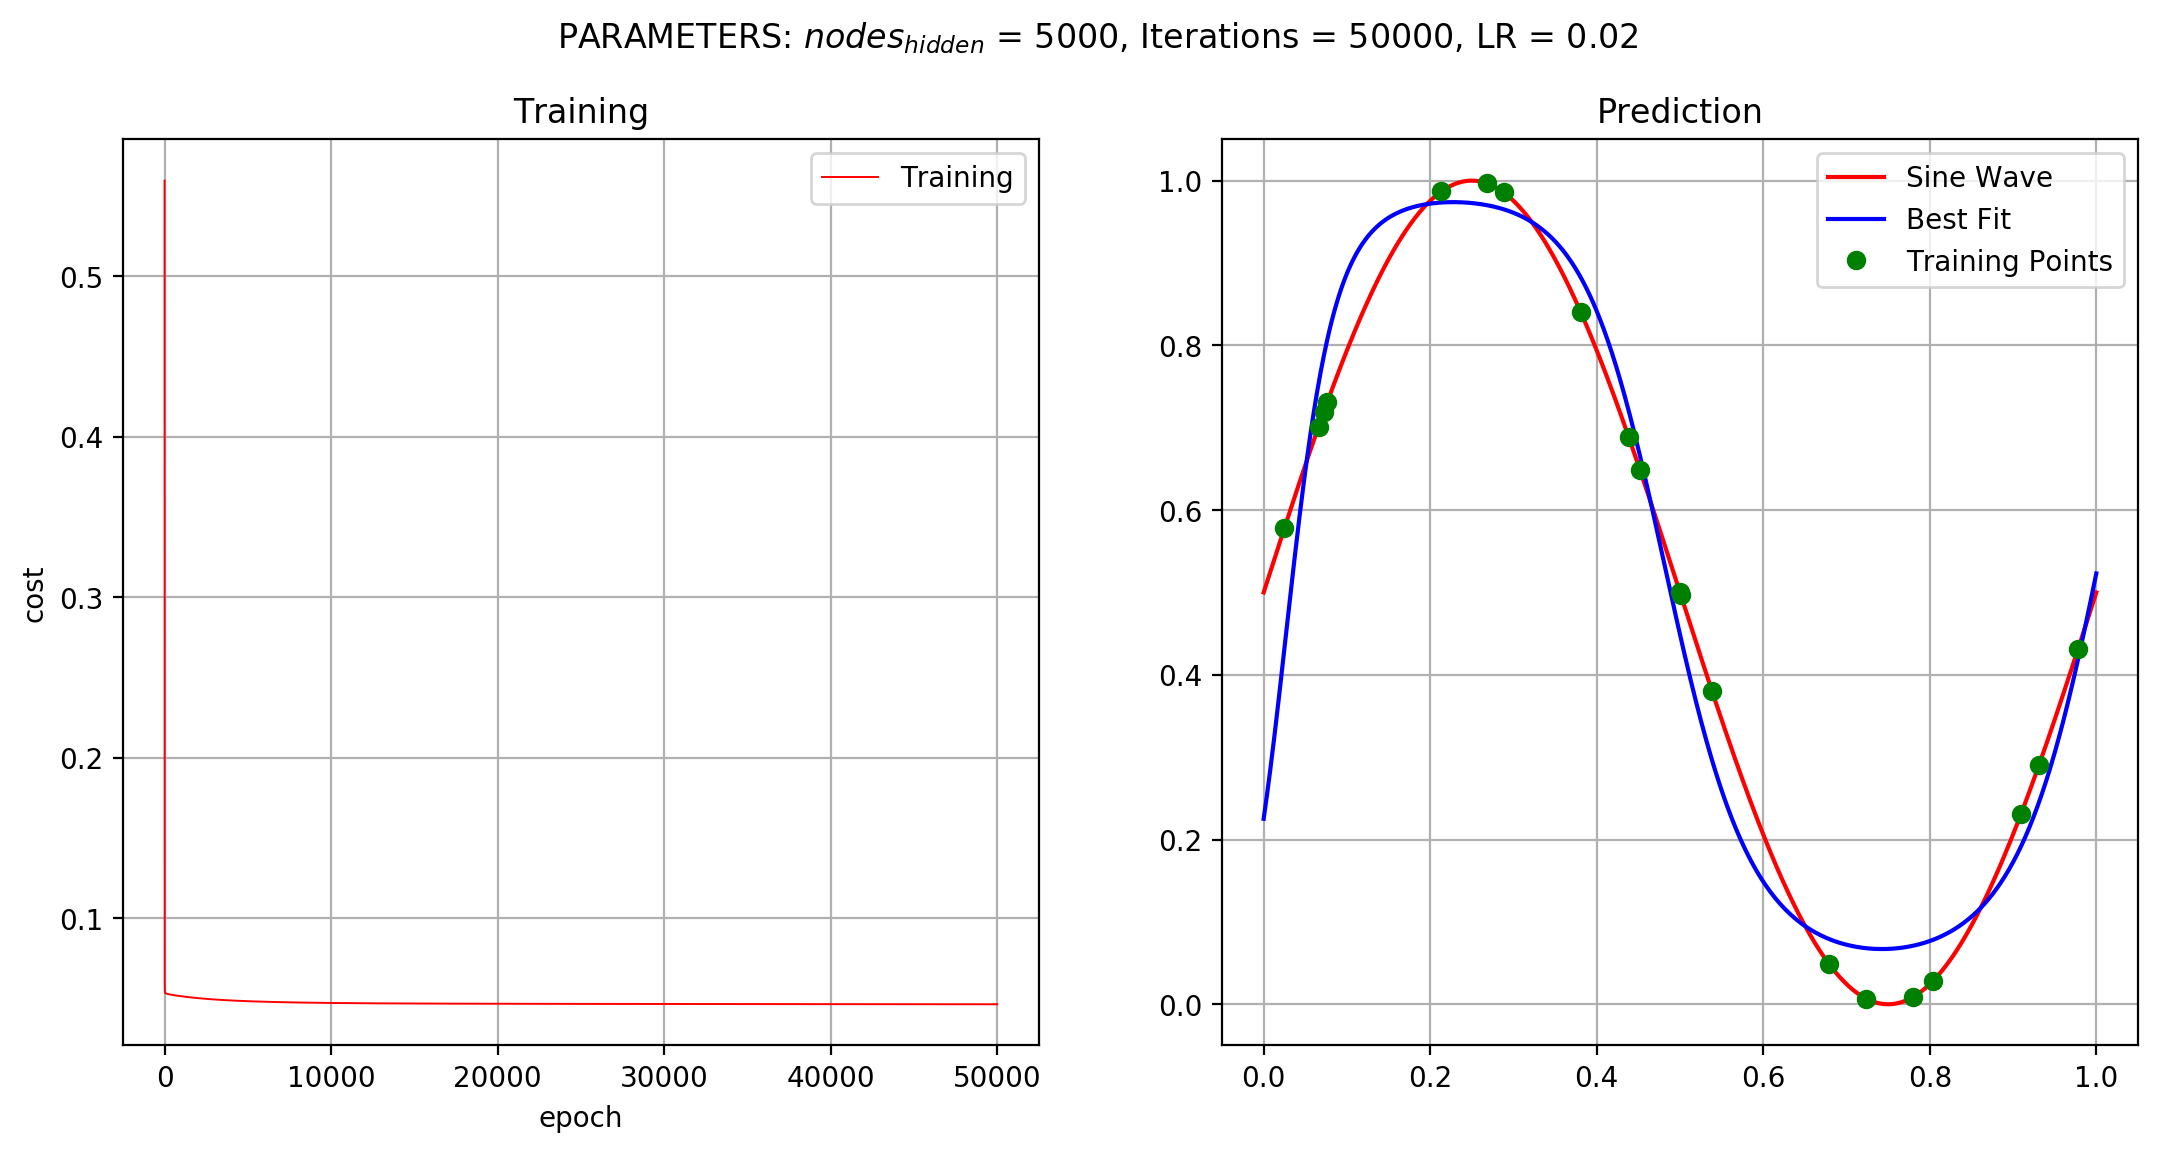

In [193]:
Curve_Fit_NN(x_train, y_train, 1, 5000, 1, 50000, 0.02)